# **CONJOINT ANALYSIS**

Conjoint Analysis is a marketing research technique used to understand how consumers evaluate and choose products based on various characteristics (attributes and levels). The goal is to measure the value that consumers place on each attribute, helping companies design products that better align with market preferences.

In this context, our analysis specifically aims to evaluate whether the introduction of a B2C product (**fish skewer**) would be viable for MarePiù, given that the company currently operates primarily in the B2B market. By exploring consumer preferences through Conjoint Analysis, we can gain detailed insights into which combinations of attributes (e.g., type of fish, preparation method, type of breading) are most appreciated by consumers. 

In [222]:
suppressMessages(library(radiant))
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(gridExtra))
#No errors during the package loading -> suppressMessages() function to avoid displaying the warning, ensuring a smoother flow of the notebook.

---


## **1. Data collection**

To collect the data, we designed a survey using Google Forms and distributed it via a link to our family and friends.

The questionnaire consists of three sections:  
- The first section gathers **demographic information** such as age, education level, and other relevant details.  
- The second section explores **consumption habits**, focusing on the frequency of fish consumption, both in general and specifically for frozen fish.  
- The core part of the survey, designed for the conjoint analysis, asks respondents to **evaluate in a range 0 to 10 different fish skewers** based on various attributes (e.g., cooking time, type of fish, etc.).

We collected a total of **122 responses**, of which **95 were from frozen fish consumers** who provided the required evaluations for the analysis.

---

### **1.1.  Product Selection and Attribute Definition**

The product was selected for the conjoint analysis because the company under consideration offers fish skewers in various types for the **B2B** market. Our objective is to identify the best combination of attributes to introduce into the **B2C** market.

To achieve this, we selected certain characteristics already listed on the **Marepiù** website and used them as attributes for the study.  

Additionally, we incorporated other characteristics based on insights from our previous **segmentation analysis**, which highlighted the necessity for diversification in **packaging format** and **cooking time**. Given these findings, we decided to include them in the conjoint analysis.

The **price** was excluded from the study because we lacked information on the company's production costs. Using generic price ranges (e.g., high, medium, low) would not have provided meaningful or actionable insights for the conjoint analysis.


Attributes and Levels:
- **Panatura** (nessuna, panko, gratinati)
- **Tipo di pesce** (gambero, salmone, calamaro)
- **Tempo di preparazione** (meno di 8 min, tra 8 e 15 min, più di 15 min)
- **Formato confezione** (monoporzione, doppia porzione, formato famiglia)
- **Spezie** (nessuna, prezzemolo e basilico, salvia e rosmarino)

---

### **1.1. Bundles' Choice**

To determine **how many** and **which** bundles to include in the survey, we used the DOE (Design of Experiments) function, which helps generate random combinations of attributes and understand the optimal number of bundles to propose, in order to avoid overwhelming the respondents.

In [223]:
data.attribute1 <- "Panatura; Nessuna; Panko; Gratinati"
data.attribute2 <- "Tipo di pesce; Gambero; Salmone; Calamaro"
data.attribute3 <- "Tempo di Preparazione; Meno di 8; Tra 8 e 15; Più di 15"
data.attribute4 <- "Formato confezione; monoporzione; doppia porzione; formato famiglia"
data.attribute5 <- 'Spezie; Nessuna; Prezzemolo e Basilico; Salvia e Rosmarino'


data.attributes <- c(data.attribute1, data.attribute2, data.attribute3, data.attribute4, data.attribute5)

In [224]:
summary(doe(data.attributes, seed = 42))

Experimental design
# trials for partial factorial: 18 
# trials for full factorial   : 243 
Random seed                   : 42 

Attributes and levels:
Panatura: Nessuna, Panko, Gratinati 
Tipo_di_pesce: Gambero, Salmone, Calamaro 
Tempo_di_Preparazione: Meno_di_8, Tra_8_e_15, Più_di_15 
Formato_confezione: monoporzione, doppia_porzione, formato_famiglia 
Spezie: Nessuna, Prezzemolo_e_Basilico, Salvia_e_Rosmarino 

Design efficiency:
 Trials D-efficiency Balanced
     11        0.554    FALSE
     12        0.731     TRUE
     13        0.651    FALSE
     14        0.704    FALSE
     15        0.653     TRUE
     16        0.703    FALSE
     17        0.352    FALSE
     18        1.000     TRUE

Partial factorial design correlations:
** Note: Variables are assumed to be ordinal **
                      Panatura Tipo_di_pesce Tempo_di_Preparazione
Panatura                     1             0                     0
Tipo_di_pesce                0             1                     0
Te

The optimal number of bundles to propose was found to be **18**, as it corresponds to a D-efficiency of 1, meaning that the selection of bundles is balanced and complete when describing different attributes:

In [225]:
design_efficiency <- data.frame(
  Trials = c(11, 12, 13, 14, 15, 16, 17, 18),
  D_efficiency = c(0.554, 0.731, 0.651, 0.704, 0.653, 0.703, 0.352, 1.000),
  Balanced = c(FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, TRUE)
)

design_efficiency

Trials,D_efficiency,Balanced
<dbl>,<dbl>,<lgl>
11,0.554,FALSE
12,0.731,TRUE
13,0.651,FALSE
14,0.704,FALSE
15,0.653,TRUE
16,0.703,FALSE
17,0.352,FALSE
18,1.000,TRUE


Now, we proceed with the exact identification of the 18 bundles.

In [226]:
summary(doe(data.attributes, seed = 42, trials = 18))

Experimental design
# trials for partial factorial: 18 
# trials for full factorial   : 243 
Random seed                   : 42 

Attributes and levels:
Panatura: Nessuna, Panko, Gratinati 
Tipo_di_pesce: Gambero, Salmone, Calamaro 
Tempo_di_Preparazione: Meno_di_8, Tra_8_e_15, Più_di_15 
Formato_confezione: monoporzione, doppia_porzione, formato_famiglia 
Spezie: Nessuna, Prezzemolo_e_Basilico, Salvia_e_Rosmarino 

Design efficiency:
 Trials D-efficiency Balanced
     18        1.000     TRUE

Partial factorial design correlations:
** Note: Variables are assumed to be ordinal **
                      Panatura Tipo_di_pesce Tempo_di_Preparazione
Panatura                     1             0                     0
Tipo_di_pesce                0             1                     0
Tempo_di_Preparazione        0             0                     1
Formato_confezione           0             0                     0
Spezie                       0             0                     0
           

These are the 18 bundles to which the respondents will need to assign a rating from 1 to 10 in the questionnaire:

In [227]:
bundles <- data.frame(
  Panatura = c("Nessuna", "Nessuna", "Nessuna", "Nessuna", "Nessuna", "Nessuna", "Panko", "Panko", "Panko", "Panko", "Panko", "Panko", "Gratinati", "Gratinati", "Gratinati", "Gratinati", "Gratinati", "Gratinati"),
  Tipo_di_pesce = c("Gambero", "Gambero", "Salmone", "Salmone", "Calamaro", "Calamaro", "Gambero", "Gambero", "Salmone", "Salmone", "Calamaro", "Calamaro", "Gambero", "Gambero", "Salmone", "Salmone", "Calamaro", "Calamaro"),
  Tempo_di_Preparazione = c("Meno_di_8", "Tra_8_e_15", "Meno_di_8", "Più_di_15", "Tra_8_e_15", "Più_di_15", "Meno_di_8", "Più_di_15", "Tra_8_e_15", "Più_di_15", "Meno_di_8", "Tra_8_e_15", "Tra_8_e_15", "Più_di_15", "Meno_di_8", "Tra_8_e_15", "Meno_di_8", "Più_di_15"),
  Formato_confezione = c("formato_famiglia", "doppia_porzione", "monoporzione", "monoporzione", "formato_famiglia", "doppia_porzione", "doppia_porzione", "formato_famiglia", "formato_famiglia", "doppia_porzione", "monoporzione", "monoporzione", "monoporzione", "monoporzione", "formato_famiglia", "doppia_porzione", "doppia_porzione", "formato_famiglia"),
  Spezie = c("Nessuna", "Nessuna", "Nessuna", "Nessuna", "Nessuna", "Nessuna", "Salvia_e_Rosmarino", "Prezzemolo_e_Basilico", "Salvia_e_Rosmarino", "Prezzemolo_e_Basilico", "Salvia_e_Rosmarino", "Prezzemolo_e_Basilico", "Salvia_e_Rosmarino", "Prezzemolo_e_Basilico", "Salvia_e_Rosmarino", "Nessuna", "Nessuna", "Prezzemolo_e_Basilico")
)

bundles

Panatura,Tipo_di_pesce,Tempo_di_Preparazione,Formato_confezione,Spezie
<chr>,<chr>,<chr>,<chr>,<chr>
Nessuna,Gambero,Meno_di_8,formato_famiglia,Nessuna
Nessuna,Gambero,Tra_8_e_15,doppia_porzione,Nessuna
Nessuna,Salmone,Meno_di_8,monoporzione,Nessuna
Nessuna,Salmone,Più_di_15,monoporzione,Nessuna
Nessuna,Calamaro,Tra_8_e_15,formato_famiglia,Nessuna
Nessuna,Calamaro,Più_di_15,doppia_porzione,Nessuna
Panko,Gambero,Meno_di_8,doppia_porzione,Salvia_e_Rosmarino
Panko,Gambero,Più_di_15,formato_famiglia,Prezzemolo_e_Basilico
Panko,Salmone,Tra_8_e_15,formato_famiglia,Salvia_e_Rosmarino


## **2. Data Pre-Processing**

In [228]:
#The answers of the questionnaire are imported
file_csv <- "conjoint_rawdata.csv"
survey_raw <- read.csv(file_csv)
survey_raw

Informazioni.cronologiche,In.che.genere.ti.identifichi.,Qual.è.la.tua.età.,Qual.è.la.tua.occupazione.,Da.quante.persone.è.composto.il.tuo.nucleo.familiare.,Dove.abiti.al.momento.,Quanto.spesso.consumi.pesce.,In.media..quante.delle.volte.che.consumi.pesce..il.pesce.è.surgelato.,Che.tipo.di.pesce.surgelato.consumi...Puoi.selezionare.più.risposte.,Hai.una.marca.di.fiducia.per.l.acquisto.di.prodotti.di.pesce.surgelati.,⋯,X10..Spiedino.di.Salmone.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.per.due.persone,X11..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni,X12..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.monoporzioni,X13..Spiedino.di.Gambero.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.monoporzioni,X14..Spiedino.di.Gambero.Gratinato.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.monoporzioni,X15..Spiedino.di.Salmone.Gratinato.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia,X16..Spiedino.di.Salmone.Gratinato.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.due.persone,X17..Spiedino.di.Calamaro.Gratinato.con.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone,X18..Spiedino.di.Calamaro.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia,Quali.sono.le.caratteristiche.che.hanno.influenzato.di.più.la.tua.valutazione...Puoi.selezionare.più.risposte.
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2025/01/24 10:32:13 AM CET,Femminile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti;Tranci/Filetti di pesce,No,⋯,9,8,2,8,7,2,8,3,4,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura
2025/01/24 10:33:56 AM CET,Femminile,18-25,Lavoratore,4+,Nord Italia,Mai,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
2025/01/24 10:52:44 AM CET,Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti,Si,⋯,7,10,9,8,8,7,8,10,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Presenza e combinazione di spezie
2025/01/24 11:58:14 AM CET,Femminile,60-70,Lavoratore,1,Nord Italia,Una/due volte al mese,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,⋯,8,4,2,10,10,1,8,3,0,Tipo di pesce utilizzato per lo spiedino surgelato;Formato confezione
2025/01/24 11:59:33 AM CET,Maschile,26-35,Lavoratore,1,Nord Italia,Più volte a settimana,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,⋯,7,6,6,5,5,9,7,7,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Formato confezione
2025/01/24 12:48:20 PM CET,Femminile,60-70,Lavoratore,2-4,Sud Italia e Isole,Più volte a settimana,Spesso,Condimenti per pasta o riso;,Si,⋯,6,8,6,7,6,7,5,8,8,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Tempo di preparazione
2025/01/24 2:43:49 PM CET,Femminile,46-60,Lavoratore,4+,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,⋯,10,10,10,10,10,10,10,10,10,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione
2025/01/24 3:18:26 PM CET,Femminile,26-35,Studente,1,Nord Italia,Più volte a settimana,Spesso,Tranci/Filetti di pesce,No,⋯,6,8,8,6,8,9,9,9,6,Presenza e tipo di panatura;Presenza e combinazione di spezie
2025/01/24 4:11:43 PM CET,Femminile,26-35,Lavoratore,2-4,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,⋯,4,4,2,2,2,2,8,6,2,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione;Formato confezione


---

#### **2.1. Potential Costumers**

We wanted to understand the percentage of respondents who never eat fish or frozen fish, as their answers do not provide valuable information for the conjoint analysis.

In [229]:
count_mai <- sum(survey_raw$Quanto.spesso.consumi.pesce. == "Mai", na.rm = TRUE)
total_rows <- nrow(survey_raw)

percentage_mai <- (count_mai / total_rows) * 100

cat(sprintf("According to our data, the percentage of respondents who don't eat fish is %.2f%%\n", percentage_mai))

According to our data, the percentage of respondents who don't eat fish is 6.56%


In [230]:
count_nofrozen <- sum(survey_raw$In.media..quante.delle.volte.che.consumi.pesce..il.pesce.è.surgelato. == "Mai", na.rm = TRUE)
total_responses_frozen <- sum(survey_raw$Quanto.spesso.consumi.pesce. != "Mai", na.rm = TRUE)

percentage_nofrozen <- (count_nofrozen / total_responses_frozen) * 100

cat(sprintf("The percentage of respondents who don't eat frozen fish is %.2f%%\n", percentage_nofrozen))

The percentage of respondents who don't eat frozen fish is 16.67%


In the survey, we added a question asking if they would consider consuming frozen fish under certain conditions and which.

In [231]:
unique_values <- unique(survey_raw$A.quali.condizioni.considereresti.l.acquisto.di.prodotti.di.pesce.surgelati.) 

unique_values

[1] ""                                                                                                                                          
 [2] "Se so che sono stati pescati "                                                                                                             
 [3] "Se mio marito non facesse lo schifiltoso"                                                                                                  
 [4] "Mai"                                                                                                                                       
 [5] "In luoghi lontani dal mare"                                                                                                                
 [6] "Solo se non riesco ad andare in pescheria per comprarlo fresco. Piuttosto faccio la scorta e me lo sporziono e lo congelo nel mio freezer "
 [7] "Se non abitassi in un posto di mare"                                                                                                       
 [8] "non lo considererei, sì solo ai bastoncini di pesce"                                                                                       
 [9] "?"                                                                                                                                         
[10] "In caso di emergenza"                                                                                                                      
[11] "Non li acquisterei mai "                                                                                                                   
[12] "Che sia congelato correttamente "                                                                                                          
[13] "Per fare pietanze cotte"                                                                                                                   
[14] "Non lo prendo in considerazione mai"                                                                                                       
[15] "Non lo mangerei mai surgelato "                                                                                                            
[16] "Mai, perché abito in una città sul mare"                                                                                                   
[17] "Per necessità urgente in mancanza di pescato"

In the sample, there are **no particular conditions for acquiring new potential customers**. However, it is important to note the significance of transparency towards the customer: some respondents state that they would buy frozen fish products if they were reassured about the origin and the freezing method of the product.

After obtaining these two results, we can compute the percentage of potential customers.

In [232]:
eat_fish <- total_rows * (1 - percentage_mai / 100)
potential_customers <- eat_fish * (1 - percentage_nofrozen / 100)
percentage_potential_customers <- round((potential_customers / total_rows) * 100, 2)

cat(sprintf("The percentage of potential customers is %.2f%% of the sample.\n", percentage_potential_customers))

The percentage of potential customers is 77.87% of the sample.


**Da inserire: la percentuale di persone che tendono ad acquistare marca più conveniente (se prezzo non è competitivo, sarebbero disposti a comprare?), capire perchè le persono scelgono marca di fiducia**

---

#### **2.2. Data Manipulation**

We removed useless columns...

In [292]:
survey_raw <- survey_raw[, !colnames(survey_raw) %in% c("Informazioni.cronologiche")]

.. and renamed the remaining ones in order to simplify the analysis.

In [293]:
renamed_col <- c(
  'In.che.genere.ti.identifichi.' = 'gender',
  'Qual.è.la.tua.età.' = 'age',
  'Qual.è.la.tua.occupazione.' = 'occupation',
  'Da.quante.persone.è.composto.il.tuo.nucleo.familiare.' = 'family_size',
  'Dove.abiti.al.momento.' = 'location',
  'Quanto.spesso.consumi.pesce.' = 'fish_consumption_frequency',
  'In.media..quante.delle.volte.che.consumi.pesce..il.pesce.è.surgelato.' = 'frozen_fish_consumption_frequency',
  'Che.tipo.di.pesce.surgelato.consumi...Puoi.selezionare.più.risposte.' = 'frozen_fish_type',
  'Hai.una.marca.di.fiducia.per.l.acquisto.di.prodotti.di.pesce.surgelati.' = 'trusted_brand',
  'Quali.caratteristiche.di.una.marca.ti.portano.a.sceglierla.come.la.tua.marca.di.fiducia..' = 'reason_to_trust',
  'Tendi.ad.acquistare.sempre.il.prodotto.di.pesce.surgelato.più.economico.' = 'buy_cheapest_frozen_fish',
  'Qual.è.la.ragione.principale.per.cui.non.consumi.pesce.' = 'reason_to_not_consume',
  'A.quali.condizioni.considereresti.l.acquisto.di.prodotti.di.pesce.surgelati.' = 'conditions_to_consume',
  'X1..Spiedino.di.Gambero.con.nessuna.panatura.e.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia' = 'Gambero_Nessuna_Nessuna_MenoDi8_Famiglia',
  'X2..Spiedino.di.Gambero.con.nessuna.panatura.ma.con.Salvia.e.Rosmarino..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.2.persone' = 'Gambero_Nessuna_SalviaRosmarino_8-15_Doppia',
  'X3..Spiedino.di.salmone.con.nessuna.panatura.ma.con.Prezzemolo.e.Basilico..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni' = 'Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono',
  'X4..Spiedino.di.Salmone.con.nessuna.panatura.e.nessuna.spezia..pronto.in.Più.di.15.minuti.e.venduto.in.Monoporzioni' = 'Salmone_Nessuna_Nessuna_PiùDi15_Mono',
  'X5..Spiedino.di.Calamaro.con.Nessuna.panatura.ma.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.confezioni.famiglia' = 'Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia',
  'X6..Spiedino.di.Calamaro.con.nessuna.panatura.ma.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.da.due.persone' = 'Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia',
  'X7..Spiedino.di.Gambero.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone.NB..La.panatura..Panko..è.fatto.con.la.sola.mollica.di.pane.bianco.e.rende.le.fritture.particolarmente.croccanti' = 'Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia',
  'X8..Spiedino.di.Gambero.croccanti.al.Panko.e.nessuna.spezia..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia' = 'Gambero_Panko_Nessuna_PiùDi15_Famiglia',
  'X9..Spiedino.di..Salmone.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.8.15.minuti.e.venduto.in.confezioni.famiglia' = 'Salmone_Panko_SalviaRosmarino_8-15_Famiglia',
  'X10..Spiedino.di.Salmone.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.per.due.persone' = 'Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia',
  'X11..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni' = 'Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono',
  'X12..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.monoporzioni' = 'Calamaro_Panko_Nessuna_8-15_Mono',
  'X13..Spiedino.di.Gambero.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.monoporzioni' = 'Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono',
  'X14..Spiedino.di.Gambero.Gratinato.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.monoporzioni' = 'Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono',
  'X15..Spiedino.di.Salmone.Gratinato.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia' = 'Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia',
  'X16..Spiedino.di.Salmone.Gratinato.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.due.persone' = 'Salmone_Gratinato_Nessuna_8-15_Doppia',
  'X17..Spiedino.di.Calamaro.Gratinato.con.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone' = 'Calamaro_Gratinato_Nessuna_MenoDi8_Doppia',
  'X18..Spiedino.di.Calamaro.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia' = 'Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia',
  'Quali.sono.le.caratteristiche.che.hanno.influenzato.di.più.la.tua.valutazione...Puoi.selezionare.più.risposte.' = 'major_influences'
)

colnames(survey_raw) <- renamed_col[colnames(survey_raw)]

In [294]:
survey_raw

NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9,⋯,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
Femminile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti;Tranci/Filetti di pesce,No,,⋯,8,2,8,7,2,8,3,4,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura,1
Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti,Si,Gusto e convenienza,⋯,10,9,8,8,7,8,10,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Presenza e combinazione di spezie,2
Femminile,60-70,Lavoratore,1,Nord Italia,Una/due volte al mese,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,,⋯,4,2,10,10,1,8,3,0,Tipo di pesce utilizzato per lo spiedino surgelato;Formato confezione,3
Maschile,26-35,Lavoratore,1,Nord Italia,Più volte a settimana,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,,⋯,6,6,5,5,9,7,7,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Formato confezione,4
Femminile,60-70,Lavoratore,2-4,Sud Italia e Isole,Più volte a settimana,Spesso,Condimenti per pasta o riso;,Si,"Il sapore,la consistenza",⋯,8,6,7,6,7,5,8,8,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Tempo di preparazione,5
Femminile,46-60,Lavoratore,4+,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,,⋯,10,10,10,10,10,10,10,10,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione,6
Femminile,26-35,Studente,1,Nord Italia,Più volte a settimana,Spesso,Tranci/Filetti di pesce,No,,⋯,8,8,6,8,9,9,9,6,Presenza e tipo di panatura;Presenza e combinazione di spezie,7
Femminile,26-35,Lavoratore,2-4,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,,⋯,4,2,2,2,2,8,6,2,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione;Formato confezione,8
Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,Si,Capitan findus mio eroe,⋯,0,0,1,1,0,0,0,0,Presenza e tipo di panatura,9


#### **2.3. EDA Analysis**

Some exploratory data analysis to visualize the distribution of answers for demographic and consumption habit variables.

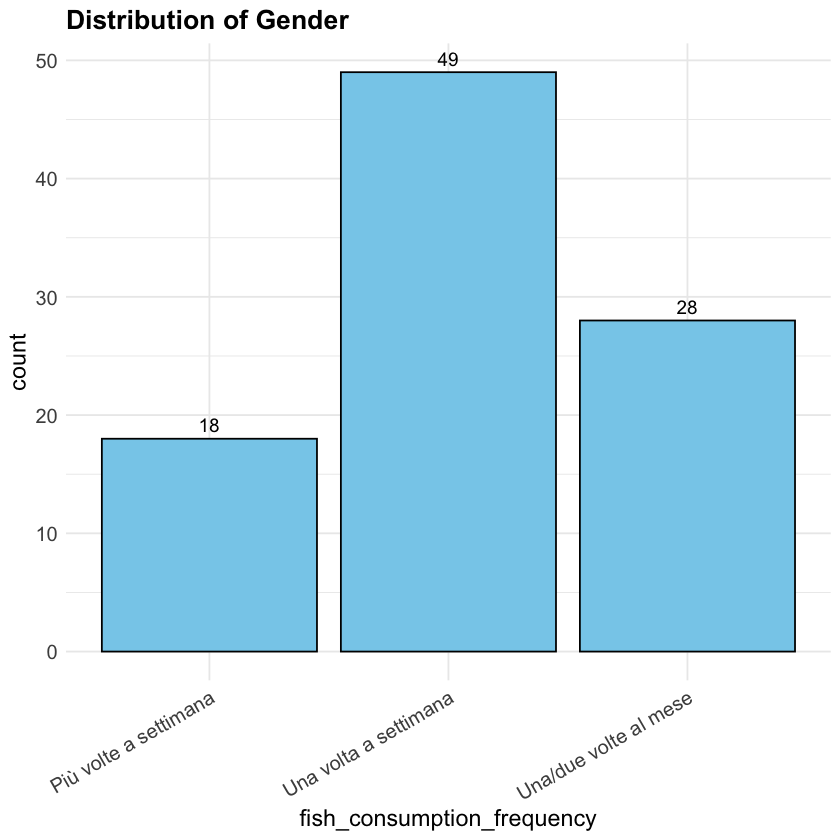

In [289]:
ggplot(survey_raw, aes(x = fish_consumption_frequency)) +  # Sostituisci 'gender' con la variabile che desideri
  geom_bar(fill = "skyblue", color = "black") + 
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5, size = 4) + 
  theme_minimal() +  
  ggtitle("Distribution of Gender") + 
  theme(axis.text.x = element_text(angle = 30, hjust = 1, size = 12),
        axis.text.y = element_text(size = 12),
        plot.title = element_text(size = 16, face = "bold"),  
        axis.title.x = element_text(size = 14),  
        axis.title.y = element_text(size = 14)) 

**analizzare quelle che ha senso plottare per capire differenze, non esce mai in consumption freqeuncy fish**

## **3. Conjoint Analysis**

#### **3.1 Conjoint dataset creation and adjustments**

After this initial analysis, we will consider only those who consume frozen fish to proceed with our work.

In [239]:
survey_raw <- survey_raw %>%
  filter(!(fish_consumption_frequency == 'Mai' | frozen_fish_consumption_frequency == 'Mai'))

We added an id for every respondent.

In [240]:
survey_raw <- survey_raw %>%
  mutate(id_respondent = 1:n())

We selected relevant columns for the conjoint analysis: id_respondent and the 18 bundles.

In [241]:
relevant_columns <- c(14:31, ncol(survey_raw))  # Indices for relevant columns
survey_data <- survey_raw[, relevant_columns]  # Select relevant columns

In [242]:
head(survey_data)

,Gambero_Nessuna_Nessuna_MenoDi8_Famiglia,Gambero_Nessuna_SalviaRosmarino_8-15_Doppia,Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono,Salmone_Nessuna_Nessuna_PiùDi15_Mono,Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia,Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia,Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia,Gambero_Panko_Nessuna_PiùDi15_Famiglia,Salmone_Panko_SalviaRosmarino_8-15_Famiglia,Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia,Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono,Calamaro_Panko_Nessuna_8-15_Mono,Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono,Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia,Salmone_Gratinato_Nessuna_8-15_Doppia,Calamaro_Gratinato_Nessuna_MenoDi8_Doppia,Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia,id_respondent
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,5,3,2,4,3,9,6,7,9,8,2,8,7,2,8,3,4,1
2,8,8,6,7,8,6,8,8,7,7,10,9,8,8,7,8,10,9,2
3,5,9,10,7,0,6,10,2,0,8,4,2,10,10,1,8,3,0,3
4,10,8,6,5,8,7,8,10,9,7,6,6,5,5,9,7,7,9,4
5,6,7,6,5,8,8,6,8,6,6,8,6,7,6,7,5,8,8,5
6,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,6


The following steps aim to create the final dataset used for the conjoint analysis:

In [243]:
# Transformation of columns forease of analysis
columns_to_melt <- names(survey_data)[1:(ncol(survey_data) - 1)]  
columns_to_keep <- names(survey_data)[ncol(survey_data)] 

conjoint_data <- survey_data %>%
  pivot_longer(cols = all_of(columns_to_melt), 
               names_to = "Question", 
               values_to = "Rating") %>%
  arrange(id_respondent)

row.names(conjoint_data) <- NULL


#Split of preferred bundles in order to obtain different answers for each attribute of the bundle
split_columns <- strsplit(as.character(conjoint_data$Question), "_")

split_columns_df <- do.call(rbind, split_columns)
colnames(split_columns_df) <- c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione")

conjoint_data <- cbind(conjoint_data, split_columns_df)

conjoint_data$Question <- NULL


#The ratings transformed from 0-10 scale to a 0-100 scale for ease of analysis
conjoint_data$Rating <- conjoint_data$Rating * 10

In [244]:
# FINAL DATASET 
conjoint_data

id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,40,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
1,50,Gambero,Nessuna,SalviaRosmarino,8-15,Doppia
1,30,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
1,20,Salmone,Nessuna,Nessuna,PiùDi15,Mono
1,40,Calamaro,Nessuna,PrezzemoloBasilico,8-15,Famiglia
1,30,Calamaro,Nessuna,SalviaRosmarino,PiùDi15,Doppia
1,90,Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia
1,60,Gambero,Panko,Nessuna,PiùDi15,Famiglia
1,70,Salmone,Panko,SalviaRosmarino,8-15,Famiglia


The table obtained above allows us to understand the rating given by each respondent for each combination of attributes proposed (=bundle). This will enable us to conduct the conjoint analysis, aiming to understand which attributes consumers consider most relevant. .

The average of total ratings is computed to have an idea of general evaluation of products.

In [245]:
mean(conjoint_data$Rating, na.rm = TRUE)

[1] 43.78947

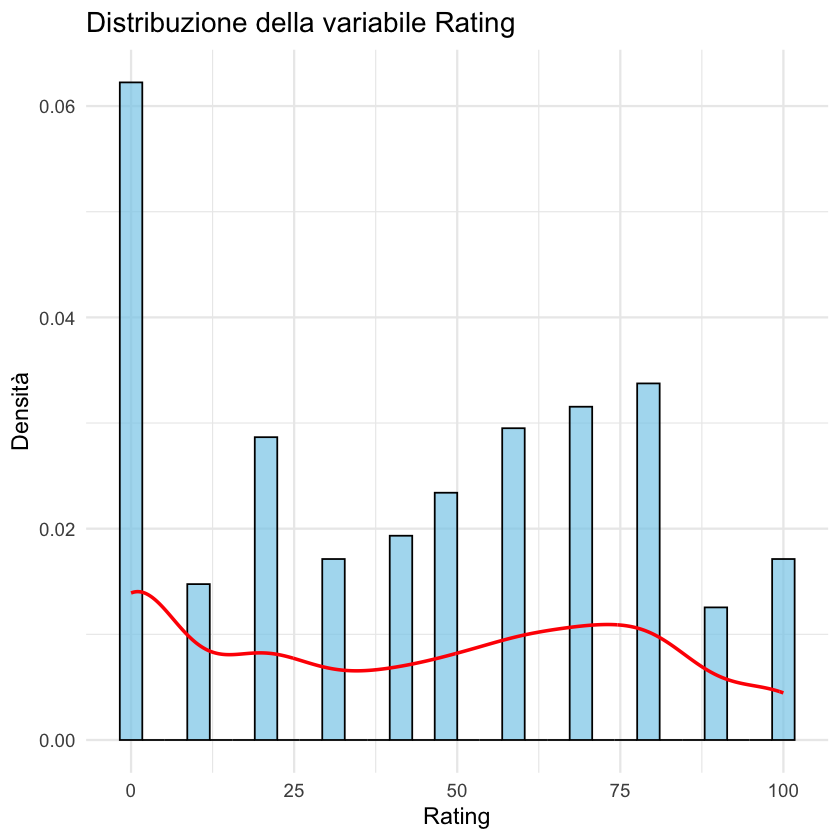

In [246]:
# Caricare la libreria ggplot2
library(ggplot2)

# Creare il grafico della distribuzione della variabile Rating
ggplot(conjoint_data, aes(x = Rating)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(color = "red", size = 1) +
  labs(title = "Distribuzione della variabile Rating",
       x = "Rating",
       y = "Densità") +
  theme_minimal(base_size = 14)

#### **3.2 Analysis**

In [247]:
## CONJOINT RESPONDENT 1

Initially, the conjoint function is applied to a single respondent, in order to obtain the relative importance of each attribute for that respondent. This step is used to validate the model and understand individual variability.

Additionally, it helps assess whether the analysis for a single respondent generates results that are consistent with the overall analysis. If the results are consistent, then the model is correctly set up.

In [248]:
respondent1 <- conjoint_data %>% filter(id_respondent == 32)
conjoint_respondent1 <- conjoint(respondent1, rvar="Rating", evar=c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione"))
summary(conjoint_respondent1)

Conjoint analysis
Data                 : respondent1 
Response variable    : Rating 
Explanatory variables: Tipo_di_Pesce, Panatura, Spezie, Tempo_di_Preparazione, Formato_Confezione 

Conjoint part-worths:
            Attributes             Levels      PW
 Tipo_di_Pesce         Calamaro             0.000
 Tipo_di_Pesce         Gambero             -8.333
 Tipo_di_Pesce         Salmone              8.333
 Panatura              Gratinato            0.000
 Panatura              Nessuna              6.667
 Panatura              Panko               -1.667
 Spezie                Nessuna              0.000
 Spezie                PrezzemoloBasilico  18.333
 Spezie                SalviaRosmarino    -13.333
 Tempo_di_Preparazione 8-15                 0.000
 Tempo_di_Preparazione MenoDi8             13.333
 Tempo_di_Preparazione PiùDi15             -3.333
 Formato_Confezione    Doppia               0.000
 Formato_Confezione    Famiglia           -56.667
 Formato_Confezione    Mono               -

The coefficients of the conjoint analysis represent the utility values assigned to different levels of each attribute relatively to the level with base utility 0.

In this analysis, the level with base utility 0 for "Tipo_di_Pesce" is "Calamaro", for "Panatura" is "Gratinato", for "Spezie" is "Nessuna", for "Tempo_di_Preparazione" is "8-15" and for "Formato_Confezione" is "Doppia".

From the results, the following considerations can be done, relatively to Respondent 1:
The preferred type of fish is "Gambero", followed by "Salmone" and than "Calamaro". 
"Panko" is preferred than "Gratinato", while "Nessuna Panatura" has a value below the base utility.
Both "PrezzemoloBasilico" and "SalviaRosmarino" are preferred than "Nessuna Spezia" with the first level having the highest value.
The preferred "Tempo_di_Preparazione" is the one associated with base utility ("8-15" minutes), since the aìother levels have both a coefficient smaller than 0.
Same consideration for "Formato_Confezione", where "Doppia" is the preferred option.

Visual representation of Respondent 1 relative preferences for each attribute:

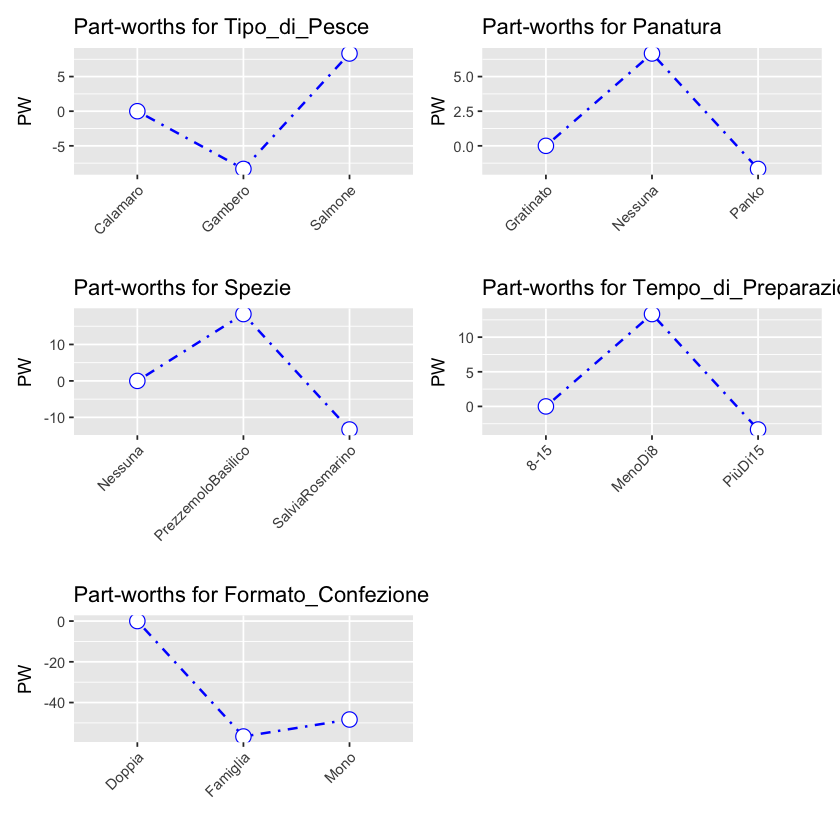

In [249]:
plot(conjoint_respondent1)

Convertion of variables into factors, representing product features and their levels:

In [250]:
conjoint_data$Tipo_di_Pesce <- as.factor(conjoint_data$Tipo_di_Pesce)
conjoint_data$Panatura <- as.factor(conjoint_data$Panatura)
conjoint_data$Spezie <- as.factor(conjoint_data$Spezie)
conjoint_data$Tempo_di_Preparazione <- as.factor(conjoint_data$Tempo_di_Preparazione)
conjoint_data$Formato_Confezione<- as.factor(conjoint_data$Formato_Confezione)

In [251]:
conjoint_data

id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,40,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
1,50,Gambero,Nessuna,SalviaRosmarino,8-15,Doppia
1,30,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
1,20,Salmone,Nessuna,Nessuna,PiùDi15,Mono
1,40,Calamaro,Nessuna,PrezzemoloBasilico,8-15,Famiglia
1,30,Calamaro,Nessuna,SalviaRosmarino,PiùDi15,Doppia
1,90,Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia
1,60,Gambero,Panko,Nessuna,PiùDi15,Famiglia
1,70,Salmone,Panko,SalviaRosmarino,8-15,Famiglia


In [252]:
## CONJOINT_TOTAL

After evaluating the model for a single respondent, we conduct the analysis on the overall dataset, obtaining the average preference of each attribute

In [253]:
conjoint_total <- conjoint(conjoint_data, rvar="Rating", evar=c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione"))

In [254]:
summary(conjoint_total)

Conjoint analysis
Data                 : conjoint_data 
Response variable    : Rating 
Explanatory variables: Tipo_di_Pesce, Panatura, Spezie, Tempo_di_Preparazione, Formato_Confezione 

Conjoint part-worths:
            Attributes             Levels     PW
 Tipo_di_Pesce         Calamaro            0.000
 Tipo_di_Pesce         Gambero             8.088
 Tipo_di_Pesce         Salmone             1.754
 Panatura              Gratinato           0.000
 Panatura              Nessuna            -0.667
 Panatura              Panko              -1.070
 Spezie                Nessuna             0.000
 Spezie                PrezzemoloBasilico  1.649
 Spezie                SalviaRosmarino     0.667
 Tempo_di_Preparazione 8-15                0.000
 Tempo_di_Preparazione MenoDi8             1.316
 Tempo_di_Preparazione PiùDi15             0.579
 Formato_Confezione    Doppia              0.000
 Formato_Confezione    Famiglia           -1.737
 Formato_Confezione    Mono               -4.737
 Base u

A comparison can be made between Respondent 1 and overall Conjoint Analysis, to evaluate coherence of results.

For the overall case the resulting preferred levels for the attributes "Tipo_di_Pesce", "Spezie" and "Formato_Confezione" are confirmed, with "Gambero", "PrezzemoloBasilico" and "Doppia" being the ones with highest utility.
For "Panatura" we have a complete change of results: "Nessuna" is the most preferred level, followed by "Gratinato" and then by "Panko", which has a coefficient lower than 0. 
On aggregate level, the preferred "Tempo_di_Preparazione" is "MenoDi8" minutes rather than "8-15" choice of Respondent 1. "PiùDi15" minutes remains associated with a negative utility value.

Since the values of coefficients for the last two analyzed variables variables are quite different, this could indicate the need of segmenting the customers.
Indeed, if the preferences of an individual are too far from the group averages, this could indicate the existence of market segments with distinct needs or behaviors, and a segmentation strategy would be useful to optimize marketing and product offerings.

Visual representation of overall relative preferences for each attribute:

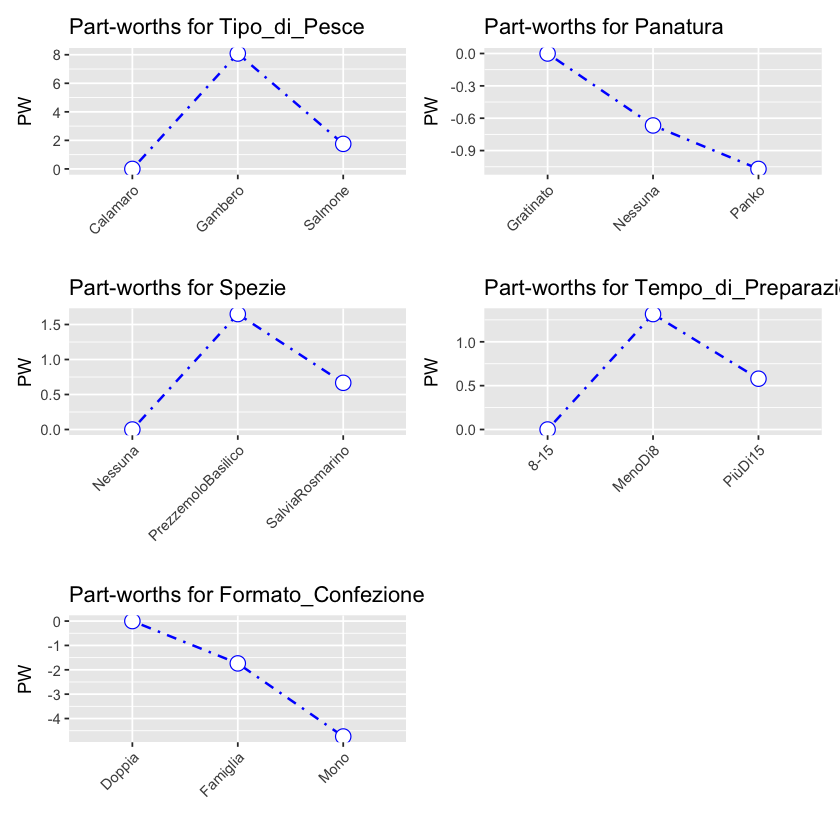

In [255]:
plot(conjoint_total)

All combinations of attributes are created:

In [256]:
profiles.all <- expand.grid(levels(conjoint_data$Tipo_di_Pesce),levels(conjoint_data$Panatura), levels(conjoint_data$Spezie), levels(conjoint_data$Tempo_di_Preparazione), levels(conjoint_data$Formato_Confezione))
profiles.all <- profiles.all %>% rename('Tipo_di_Pesce' = 'Var1', 'Panatura' = 'Var2' , 'Spezie' = 'Var3', 'Tempo_di_Preparazione' = 'Var4', 'Formato_Confezione' = 'Var5')
profiles.all

Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<fct>,<fct>,<fct>,<fct>,<fct>
Calamaro,Gratinato,Nessuna,8-15,Doppia
Gambero,Gratinato,Nessuna,8-15,Doppia
Salmone,Gratinato,Nessuna,8-15,Doppia
Calamaro,Nessuna,Nessuna,8-15,Doppia
Gambero,Nessuna,Nessuna,8-15,Doppia
Salmone,Nessuna,Nessuna,8-15,Doppia
Calamaro,Panko,Nessuna,8-15,Doppia
Gambero,Panko,Nessuna,8-15,Doppia
Salmone,Panko,Nessuna,8-15,Doppia


The rating for each combination is predicted:

In [257]:
predict(conjoint_total, profiles.all) %>% arrange(desc(Prediction))

Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Gambero,Gratinato,PrezzemoloBasilico,MenoDi8,Doppia,52.89474
Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia,52.22807
Gambero,Gratinato,PrezzemoloBasilico,PiùDi15,Doppia,52.15789
Gambero,Gratinato,SalviaRosmarino,MenoDi8,Doppia,51.91228
Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia,51.82456
Gambero,Gratinato,PrezzemoloBasilico,8-15,Doppia,51.57895
Gambero,Nessuna,PrezzemoloBasilico,PiùDi15,Doppia,51.49123
Gambero,Nessuna,SalviaRosmarino,MenoDi8,Doppia,51.24561
Gambero,Gratinato,Nessuna,MenoDi8,Doppia,51.24561


The highest rating results to be 57.9 for the following combination:

Spiedino di **gambero**, con **nessuna panatura**, speziato al **prezzemolo e basilico**, pronto in **meno di 8 minuti** e venduto in **confezione doppia**

In [258]:
##fare considerazione alla luce delle possibilità/budget

In [259]:
### Cercare combinazioni reali e vedere che punteggio hanno

In [260]:
##spiegare bene che voto massimo è meno di 55 perchè media voti complessiva molto bassa, meno di 50 (vedi sopra)

In [261]:
summary(conjoint_total)

Conjoint analysis
Data                 : conjoint_data 
Response variable    : Rating 
Explanatory variables: Tipo_di_Pesce, Panatura, Spezie, Tempo_di_Preparazione, Formato_Confezione 

Conjoint part-worths:
            Attributes             Levels     PW
 Tipo_di_Pesce         Calamaro            0.000
 Tipo_di_Pesce         Gambero             8.088
 Tipo_di_Pesce         Salmone             1.754
 Panatura              Gratinato           0.000
 Panatura              Nessuna            -0.667
 Panatura              Panko              -1.070
 Spezie                Nessuna             0.000
 Spezie                PrezzemoloBasilico  1.649
 Spezie                SalviaRosmarino     0.667
 Tempo_di_Preparazione 8-15                0.000
 Tempo_di_Preparazione MenoDi8             1.316
 Tempo_di_Preparazione PiùDi15             0.579
 Formato_Confezione    Doppia              0.000
 Formato_Confezione    Famiglia           -1.737
 Formato_Confezione    Mono               -4.737
 Base u

In [262]:
influences <- survey_raw %>%
  select(major_influences) %>%            
  separate_rows(major_influences, sep = ";") %>%  
  count(major_influences, sort = TRUE) %>%   # Conta le occorrenze
  mutate(percentuale = round(n / sum(n) * 100, 2))  # Calcola la percentuale

In [263]:
influences

major_influences,n,percentuale
<chr>,<int>,<dbl>
Tipo di pesce utilizzato per lo spiedino surgelato,65,32.5
Presenza e tipo di panatura,52,26.0
Formato confezione,36,18.0
Presenza e combinazione di spezie,33,16.5
Tempo di preparazione,13,6.5
,1,0.5


In [264]:
#fare commento di questo con risultati conjoint

In [265]:
###POSSIAMO INIZIARE A FARE MARKET SHARE

In [266]:
competitor_profiles <- profiles.all %>% slice(c(29,41))

In [267]:
rownames(competitor_profiles) <- c('Findus', 'pescebello')

In [268]:
competitor_profiles

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<fct>,<fct>,<fct>,<fct>,<fct>
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia


In [269]:
#using conjoint per predirre market share

https://prontospesa.gelmarket.it/prodotto/oggi-pesce-6-bastoncini-di-salmone-cartone-da-12-pezzi-1419339
https://prontospesa.gelmarket.it/prodotto/oggi-pesce-code-di-gamberi-argentini-1511463
https://prontospesa.gelmarket.it/prodotto/marfrio-gamberi-argentini-128048

In [270]:
predict(conjoint_total, competitor_profiles) %>% arrange(desc(Prediction)) %>% mutate(Perc=Prediction/sum(Prediction)*100)

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction,Perc
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia,52.22807,50.47474
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia,51.24561,49.52526


In [271]:
#simulando le share dei prodotti

In [272]:
product.profiles <- profiles.all %>% slice(c(21,30,36))
rownames(product.profiles) <- c('a', 'b', 'c')

In [273]:
product.profiles

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<fct>,<fct>,<fct>,<fct>,<fct>
a,Salmone,Gratinato,SalviaRosmarino,8-15,Doppia
b,Salmone,Gratinato,Nessuna,MenoDi8,Doppia
c,Salmone,Panko,Nessuna,MenoDi8,Doppia


In [274]:
market_a <- profiles.all %>% slice(c(29,41,21))

In [275]:
rownames(market_a) <- c('Findus', 'pescebello', 'a')

In [276]:
market_a

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<fct>,<fct>,<fct>,<fct>,<fct>
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia
a,Salmone,Gratinato,SalviaRosmarino,8-15,Doppia


In [277]:
predict(conjoint_total, market_a) %>% arrange(desc(Prediction)) %>% mutate(Perc=Prediction/sum(Prediction)*100)

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction,Perc
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia,52.22807,35.35210
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia,51.24561,34.68709
a,Salmone,Gratinato,SalviaRosmarino,8-15,Doppia,44.26316,29.96081


In [278]:
market_b <- profiles.all %>% slice(c(29,41,30))
rownames(market_b) <- c('Findus', 'pescebello', 'b')
market_b

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<fct>,<fct>,<fct>,<fct>,<fct>
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia
b,Salmone,Gratinato,Nessuna,MenoDi8,Doppia


In [279]:
predict(conjoint_total, market_b) %>% arrange(desc(Prediction)) %>% mutate(Perc=Prediction/sum(Prediction)*100)

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction,Perc
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia,52.22807,35.19745
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia,51.24561,34.53535
b,Salmone,Gratinato,Nessuna,MenoDi8,Doppia,44.91228,30.26720


In [280]:
market_c <- profiles.all %>% slice(c(29,41,36))
rownames(market_c) <- c('Findus', 'pescebello', 'c')
market_c

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<fct>,<fct>,<fct>,<fct>,<fct>
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia
c,Salmone,Panko,Nessuna,MenoDi8,Doppia


In [281]:
predict(conjoint_total, market_c) %>% arrange(desc(Prediction)) %>% mutate(Perc=Prediction/sum(Prediction)*100)

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction,Perc
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia,52.22807,35.45314
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia,51.24561,34.78623
c,Salmone,Panko,Nessuna,MenoDi8,Doppia,43.84211,29.76063


In [282]:
## predizione market usando first choice rule

In [283]:
market_c

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<fct>,<fct>,<fct>,<fct>,<fct>
Findus,Gambero,Gratinato,Nessuna,MenoDi8,Doppia
pescebello,Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia
c,Salmone,Panko,Nessuna,MenoDi8,Doppia


In [284]:
#conjoint analysis usando respondent come parametro 

In [285]:
conjoint_data$id_respondent <- as.factor(conjoint_data$id_respondent)
